In [1]:
import os
os.chdir('../')
import pandas as pd
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import talib as ta

from simulate.sim import create_candles, extract_final_candles

In [63]:
start_dt = '2018-11-28 22:00:00'
end_dt = '2018-11-30 23:59:59'
candle_type = '5min'

In [169]:
candles_all = create_candles(start_dt, end_dt)
candles_all_fin = extract_final_candles(candles_all)
candles = pd.DataFrame(candles_all_fin[candle_type])
candles.columns = ['open', 'high', 'low', 'close', 'volume', 'timestamp']
candles.timestamp = candles.timestamp.apply(lambda x: datetime.fromtimestamp(x/1000))
candles.index = pd.to_datetime(candles.timestamp)
candles = candles.drop(['timestamp'], axis=1)

In [173]:
timeperiod_s = 2
timeperiod_m = 5
timeperiod_l = 60
candles['ma_s'] = ta.SMA(candles.close, timeperiod_s)
candles['ma_m'] = ta.SMA(candles.close, timeperiod_m)
candles['ma_l'] = ta.SMA(candles.close, timeperiod_l)

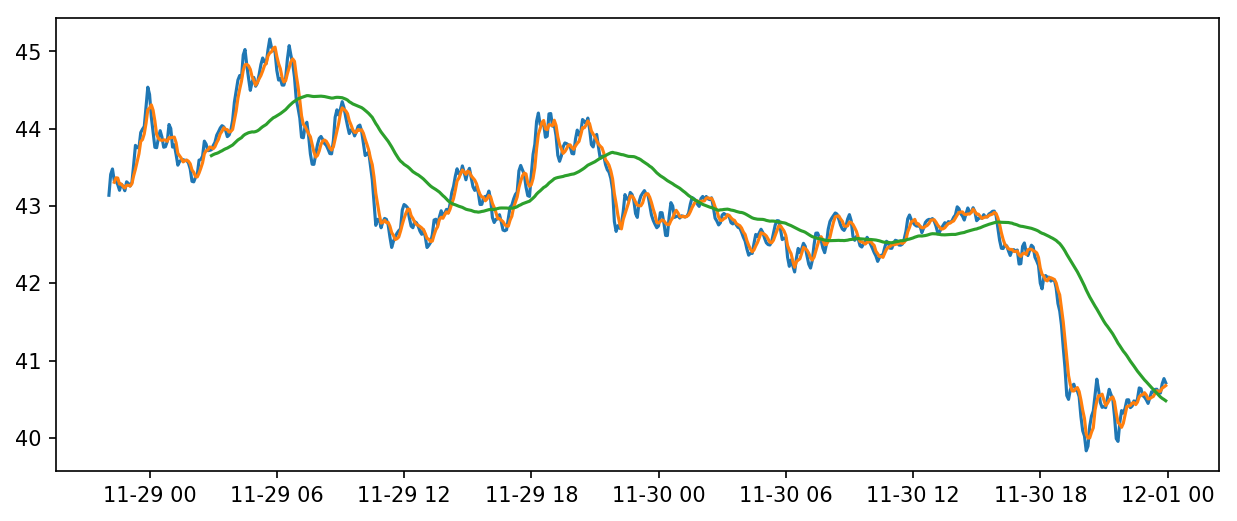

In [174]:
fig = plt.figure(figsize=(10,4),dpi=150)
plt.plot(candles[['ma_s', 'ma_m', 'ma_l']])

In [175]:
bb = None
for ary in ta.BBANDS(candles.close, timeperiod=20, nbdevup=1, nbdevdn=1):
    if bb is None:
        bb = ary
    else:
        bb = pd.concat([bb, ary], axis=1)

In [176]:
bb.columns = ['BBANDS_upperband', 'BBANDS_middleband', 'BBANDS_lowerband']

In [177]:
o = candles['open'].values
c = candles['close'].values
l = candles['low'].values
h = candles['high'].values

In [178]:
# 天井圏・高値圏のパターン①（上ヒゲ陽線、下ヒゲ陰線なし）
candles['marubozu'] = ta.CDLMARUBOZU(o, h, l, c) # 100 -> 上昇トレンド継続、 -100 -> 上昇トレンド転換
candles['closing_marubozu'] = ta.CDLCLOSINGMARUBOZU(o, h, l, c) # 100 -> 上昇トレンド継続、 -100 -> 上昇トレンド転換
candles['long_line_candle'] = ta.CDLLONGLINE(o, h, l, c) # 100 -> 上昇トレンド継続、 -100 -> 上昇トレンド転換
# 天井圏・高値圏のパターン②
candles['hammer'] = ta.CDLHAMMER(o, h, l, c) # 下降 -> 上昇
candles['inverted_hammer'] = ta.CDLINVERTEDHAMMER(o, h, l, c) # 上昇 -> 下降
candles['dragonfly_doji'] = ta.CDLDRAGONFLYDOJI(o, h, l, c) # 下降 -> 上昇
candles['gravestone_doji'] = ta.CDLGRAVESTONEDOJI(o, h, l, c) # 上昇 -> 下降
# 天井圏・高値圏のパターン③
candles['doji'] = ta.CDLDOJI(o, h, l, c) # トレンド転換
candles['long_legged_doji'] = ta.CDLLONGLEGGEDDOJI(o, h, l, c) # トレンド転換
candles['spinning_top'] = ta.CDLSPINNINGTOP(o, h, l, c) # トレンド転換
# その他
candles['CDL2CROWS'] = ta.CDL2CROWS(o, h, l, c) # トレンド転換
candles['CDL3BLACKCROWS'] = ta.CDL3BLACKCROWS(o, h, l, c) # トレンド転換
candles['CDL3INSIDE'] = ta.CDL3INSIDE(o, h, l, c) # トレンド転換
candles['CDL3LINESTRIKE'] = ta.CDL3LINESTRIKE(o, h, l, c) # トレンド転換
candles['CDL3OUTSIDE'] = ta.CDL3OUTSIDE(o, h, l, c) # トレンド転換
candles['CDL3STARSINSOUTH'] = ta.CDL3STARSINSOUTH(o, h, l, c) # トレンド転換
candles['CDL3WHITESOLDIERS'] = ta.CDL3WHITESOLDIERS(o, h, l, c) # トレンド転換
candles['CDLABANDONEDBABY'] = ta.CDLABANDONEDBABY(o, h, l, c) # トレンド転換
candles['CDLADVANCEBLOCK'] = ta.CDLADVANCEBLOCK(o, h, l, c) # トレンド転換
candles['CDLBELTHOLD'] = ta.CDLBELTHOLD(o, h, l, c) # トレンド転換
candles['CDLBREAKAWAY'] = ta.CDLBREAKAWAY(o, h, l, c) # トレンド転換
candles['CDLCLOSINGMARUBOZU'] = ta.CDLCLOSINGMARUBOZU(o, h, l, c) # トレンド転換
candles['CDLCONCEALBABYSWALL'] = ta.CDLCONCEALBABYSWALL(o, h, l, c) # トレンド転換
candles['CDLCOUNTERATTACK'] = ta.CDLCOUNTERATTACK(o, h, l, c) # トレンド転換
candles['CDLDARKCLOUDCOVER'] = ta.CDLDARKCLOUDCOVER(o, h, l, c) # トレンド転換
candles['CDLDOJI'] = ta.CDLDOJI(o, h, l, c) # トレンド転換
candles['CDLDOJISTAR'] = ta.CDLDOJISTAR(o, h, l, c) # トレンド転換
candles['CDLDRAGONFLYDOJI'] = ta.CDLDRAGONFLYDOJI(o, h, l, c) # トレンド転換
candles['CDLENGULFING'] = ta.CDLENGULFING(o, h, l, c) # トレンド転換
candles['CDLEVENINGDOJISTAR'] = ta.CDLEVENINGDOJISTAR(o, h, l, c) # トレンド転換
candles['CDLEVENINGSTAR'] = ta.CDLEVENINGSTAR(o, h, l, c) # トレンド転換
candles['CDLGAPSIDESIDEWHITE'] = ta.CDLGAPSIDESIDEWHITE(o, h, l, c) # トレンド転換
candles['CDLGRAVESTONEDOJI'] = ta.CDLGRAVESTONEDOJI(o, h, l, c) # トレンド転換
candles['CDLHAMMER'] = ta.CDLHAMMER(o, h, l, c) # トレンド転換
candles['CDLHANGINGMAN'] = ta.CDLHANGINGMAN(o, h, l, c) # トレンド転換
candles['CDLHARAMI'] = ta.CDLHARAMI(o, h, l, c) # トレンド転換
candles['CDLHARAMICROSS'] = ta.CDLHARAMICROSS(o, h, l, c) # トレンド転換
candles['CDLHIGHWAVE'] = ta.CDLHIGHWAVE(o, h, l, c) # トレンド転換
candles['CDLHIKKAKE'] = ta.CDLHIKKAKE(o, h, l, c) # トレンド転換
candles['CDLHIKKAKEMOD'] = ta.CDLHIKKAKEMOD(o, h, l, c) # トレンド転換
candles['CDLHOMINGPIGEON'] = ta.CDLHOMINGPIGEON(o, h, l, c) # トレンド転換
candles['CDLIDENTICAL3CROWS'] = ta.CDLIDENTICAL3CROWS(o, h, l, c) # トレンド転換
candles['CDLINNECK'] = ta.CDLINNECK(o, h, l, c) # トレンド転換
candles['CDLINVERTEDHAMMER'] = ta.CDLINVERTEDHAMMER(o, h, l, c) # トレンド転換
candles['CDLKICKING'] = ta.CDLKICKING(o, h, l, c) # トレンド転換
candles['CDLKICKINGBYLENGTH'] = ta.CDLKICKINGBYLENGTH(o, h, l, c) # トレンド転換
candles['CDLLADDERBOTTOM'] = ta.CDLLADDERBOTTOM(o, h, l, c) # トレンド転換
candles['CDLLONGLEGGEDDOJI'] = ta.CDLLONGLEGGEDDOJI(o, h, l, c) # トレンド転換
candles['CDLLONGLINE'] = ta.CDLLONGLINE(o, h, l, c) # トレンド転換
candles['CDLMARUBOZU'] = ta.CDLMARUBOZU(o, h, l, c) # トレンド転換
candles['CDLMATCHINGLOW'] = ta.CDLMATCHINGLOW(o, h, l, c) # トレンド転換
candles['CDLMATHOLD'] = ta.CDLMATHOLD(o, h, l, c) # トレンド転換
candles['CDLMORNINGDOJISTAR'] = ta.CDLMORNINGDOJISTAR(o, h, l, c) # トレンド転換
candles['CDLMORNINGSTAR'] = ta.CDLMORNINGSTAR(o, h, l, c) # トレンド転換
candles['CDLONNECK'] = ta.CDLONNECK(o, h, l, c) # トレンド転換
candles['CDLPIERCING'] = ta.CDLPIERCING(o, h, l, c) # トレンド転換
candles['CDLRICKSHAWMAN'] = ta.CDLRICKSHAWMAN(o, h, l, c) # トレンド転換
candles['CDLRISEFALL3METHODS'] = ta.CDLRISEFALL3METHODS(o, h, l, c) # トレンド転換
candles['CDLSEPARATINGLINES'] = ta.CDLSEPARATINGLINES(o, h, l, c) # トレンド転換
candles['CDLSHOOTINGSTAR'] = ta.CDLSHOOTINGSTAR(o, h, l, c) # トレンド転換
candles['CDLSHORTLINE'] = ta.CDLSHORTLINE(o, h, l, c) # トレンド転換
candles['CDLSPINNINGTOP'] = ta.CDLSPINNINGTOP(o, h, l, c) # トレンド転換
candles['CDLSTALLEDPATTERN'] = ta.CDLSTALLEDPATTERN(o, h, l, c) # トレンド転換
candles['CDLSTICKSANDWICH'] = ta.CDLSTICKSANDWICH(o, h, l, c) # トレンド転換
candles['CDLTAKURI'] = ta.CDLTAKURI(o, h, l, c) # トレンド転換
candles['CDLTASUKIGAP'] = ta.CDLTASUKIGAP(o, h, l, c) # トレンド転換
candles['CDLTHRUSTING'] = ta.CDLTHRUSTING(o, h, l, c) # トレンド転換
candles['CDLTRISTAR'] = ta.CDLTRISTAR(o, h, l, c) # トレンド転換
candles['CDLUNIQUE3RIVER'] = ta.CDLUNIQUE3RIVER(o, h, l, c) # トレンド転換
candles['CDLUPSIDEGAP2CROWS'] = ta.CDLUPSIDEGAP2CROWS(o, h, l, c) # トレンド転換
candles['CDLXSIDEGAP3METHODS'] = ta.CDLXSIDEGAP3METHODS(o, h, l, c) # トレンド転換

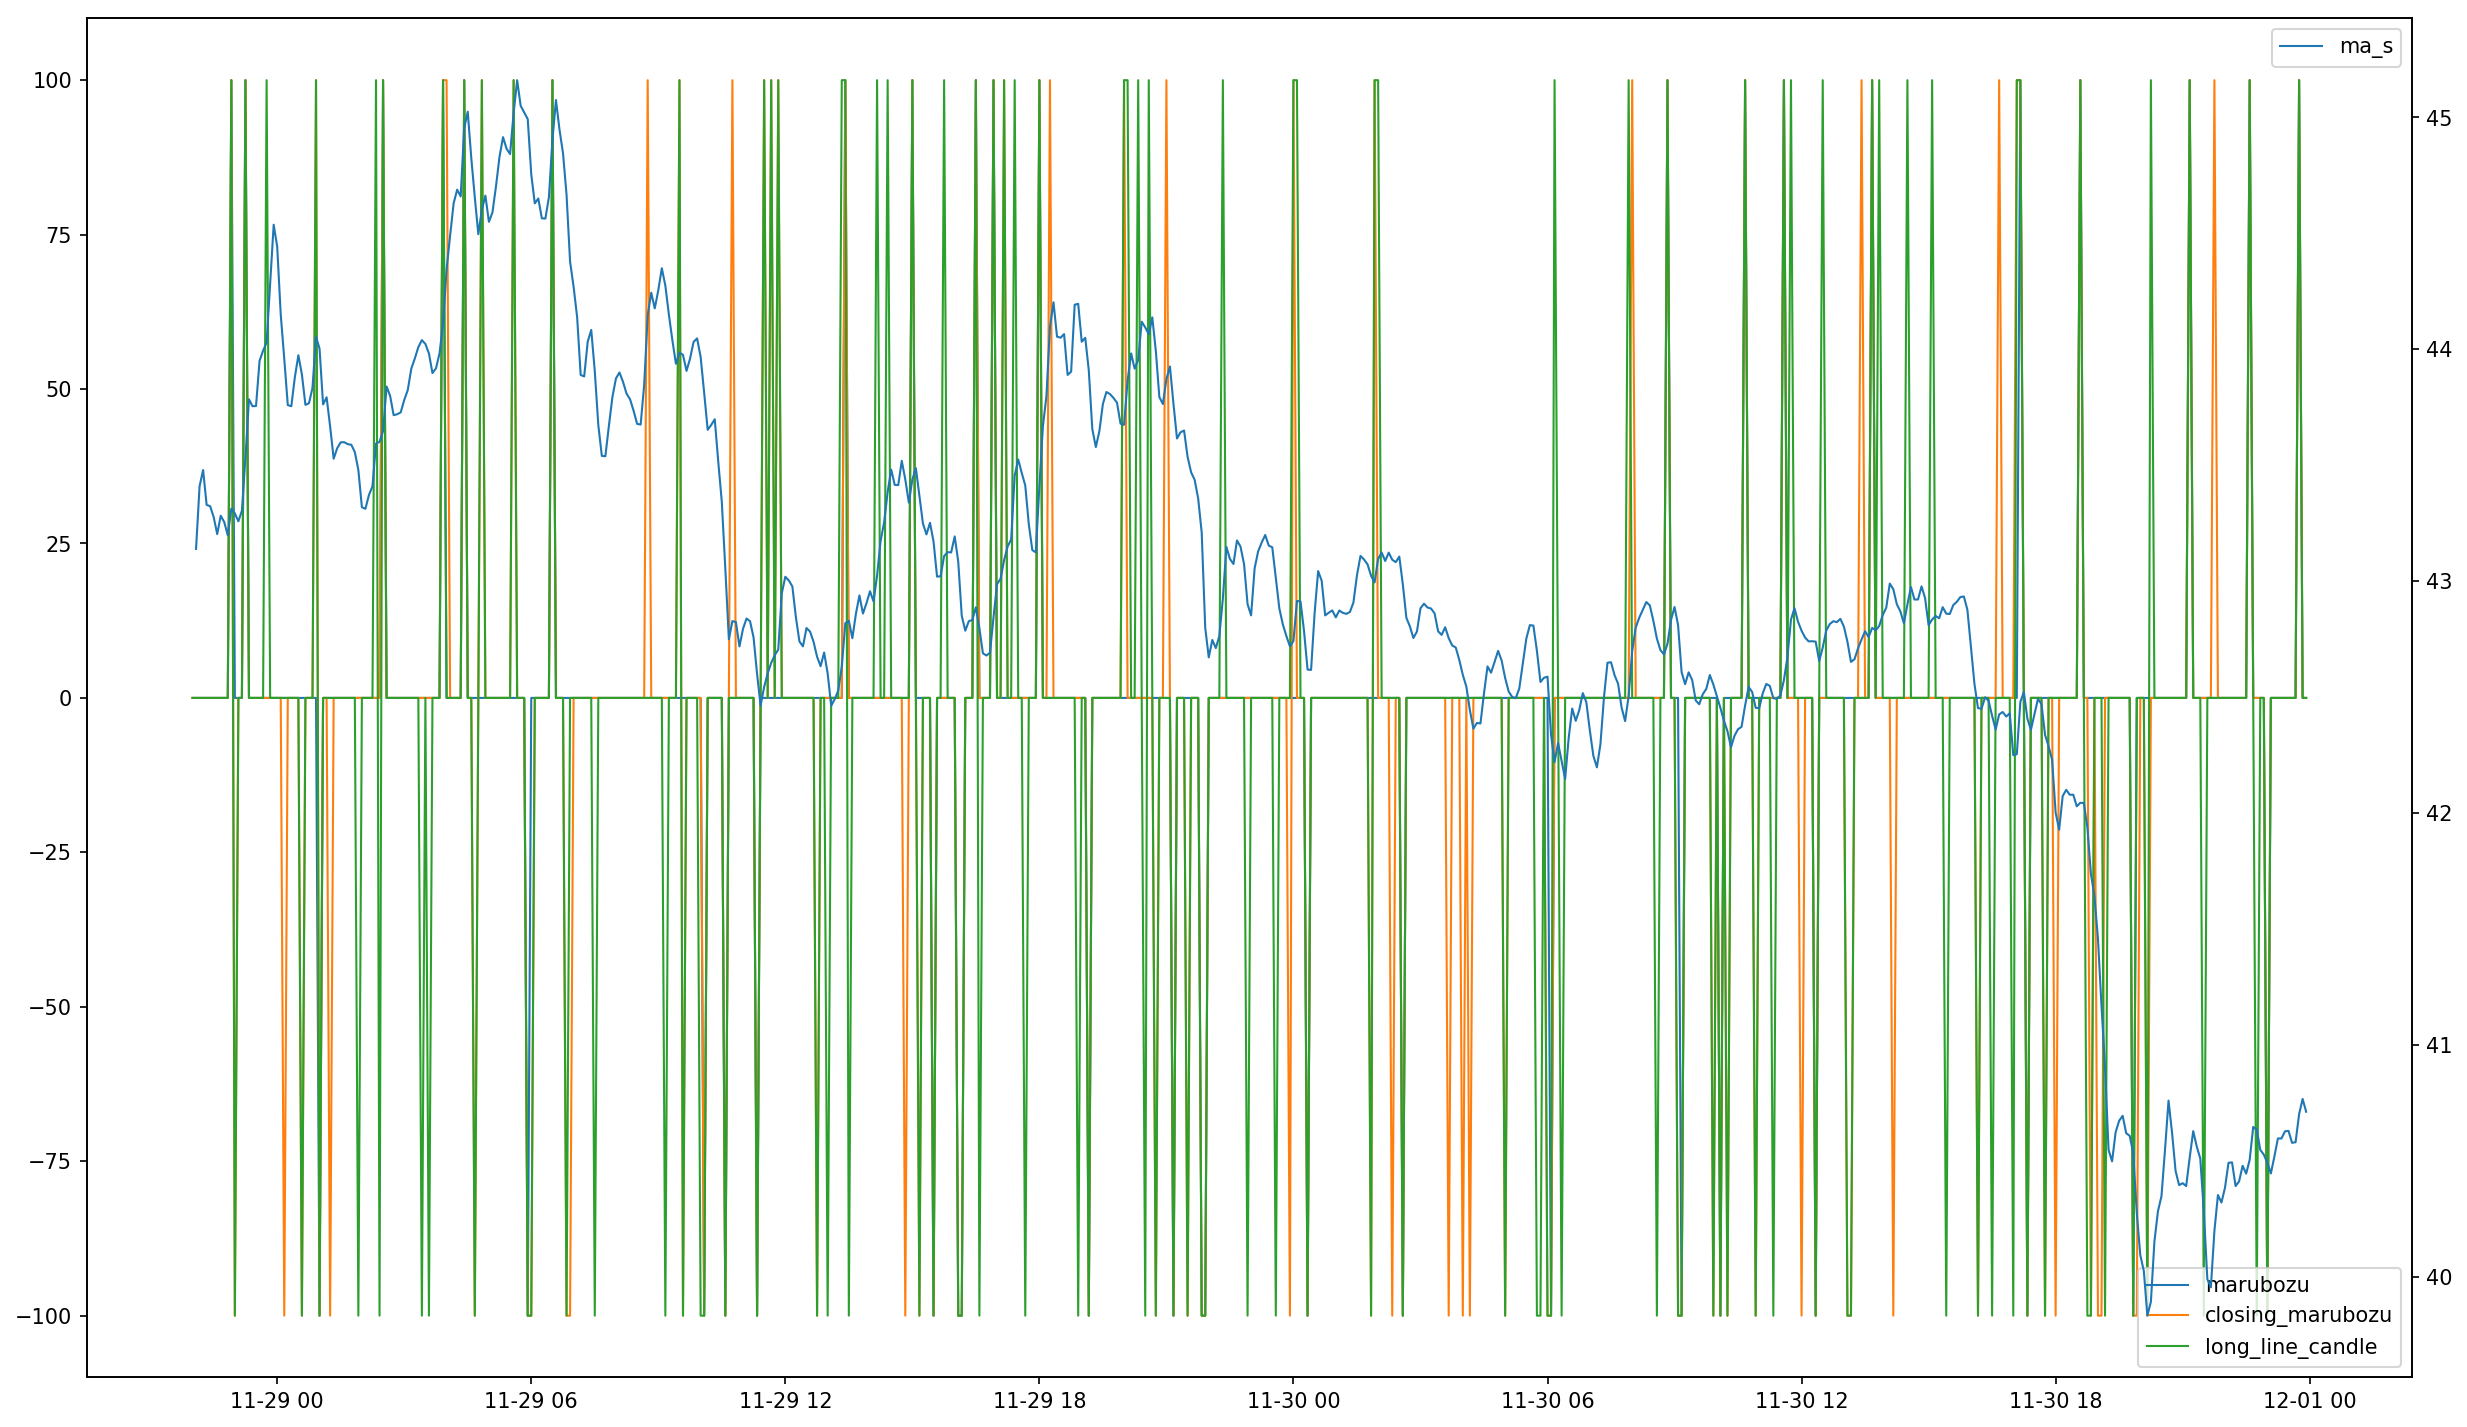

In [179]:
fig, ax1 = plt.subplots(figsize=(20, 12),dpi=150)
#plt.plot(candles[['ma_s', 'marubozu', 'closing_marubozu', 'long_line_candle', 'hammer', 'inverted_hammer', 'dragonfly_doji', 'gravestone_doji', 'doji', 'long_legged_doji', 'spinning_top']])

line1 = ax1.plot(candles.index, candles[['marubozu', 'closing_marubozu', 'long_line_candle']], linewidth = 1.0)
ax2 = ax1.twinx()
line2 = ax2.plot(candles['ma_s'], linewidth = 1.0)
ax1.legend(line1, ['marubozu', 'closing_marubozu', 'long_line_candle'])
ax2.legend()
plt.savefig('1.jpg')

In [197]:
ma = bb['BBANDS_middleband']
close = candles['close']
candles['maer'] = ((close - ma) / ma) * 100 # moving average estrangement rate

In [216]:
import numpy as np
candles_all_tmp = create_candles('2018-11-26 00:00:00', '2018-11-28 21:59:59')
candles_all_fin_tmp = extract_final_candles(candles_all_tmp)
candles_tmp = pd.DataFrame(candles_all_fin_tmp[candle_type])
candles_tmp.columns = ['open', 'high', 'low', 'close', 'volume', 'timestamp']

body = candles_tmp['high'] - candles_tmp['low']
body_mean = np.mean(body)
body_var = np.var(body)
body_std = np.std(body)

In [217]:
print('平均: {},分散: {},標準偏差: {}'.format(body_mean, body_var, body_std))

平均: 0.3188130952380954,分散: 0.04098569720946718,標準偏差: 0.20244924600864084


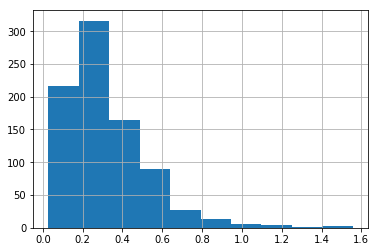

In [218]:
body.hist()

In [220]:
body_mean + body_std * 1

0.5212623412467363

In [207]:
body_upper = body_mean + body_std * 2
body_lower = body_mean - body_std * 2

In [208]:
candles['mymarubozu'] = np.zeros(len(candles))
body = candles['close'] - candles['open']
candles.loc[body > body_upper, ['mymarubozu']] = 100
candles.loc[body < body_lower, ['mymarubozu']] = -100

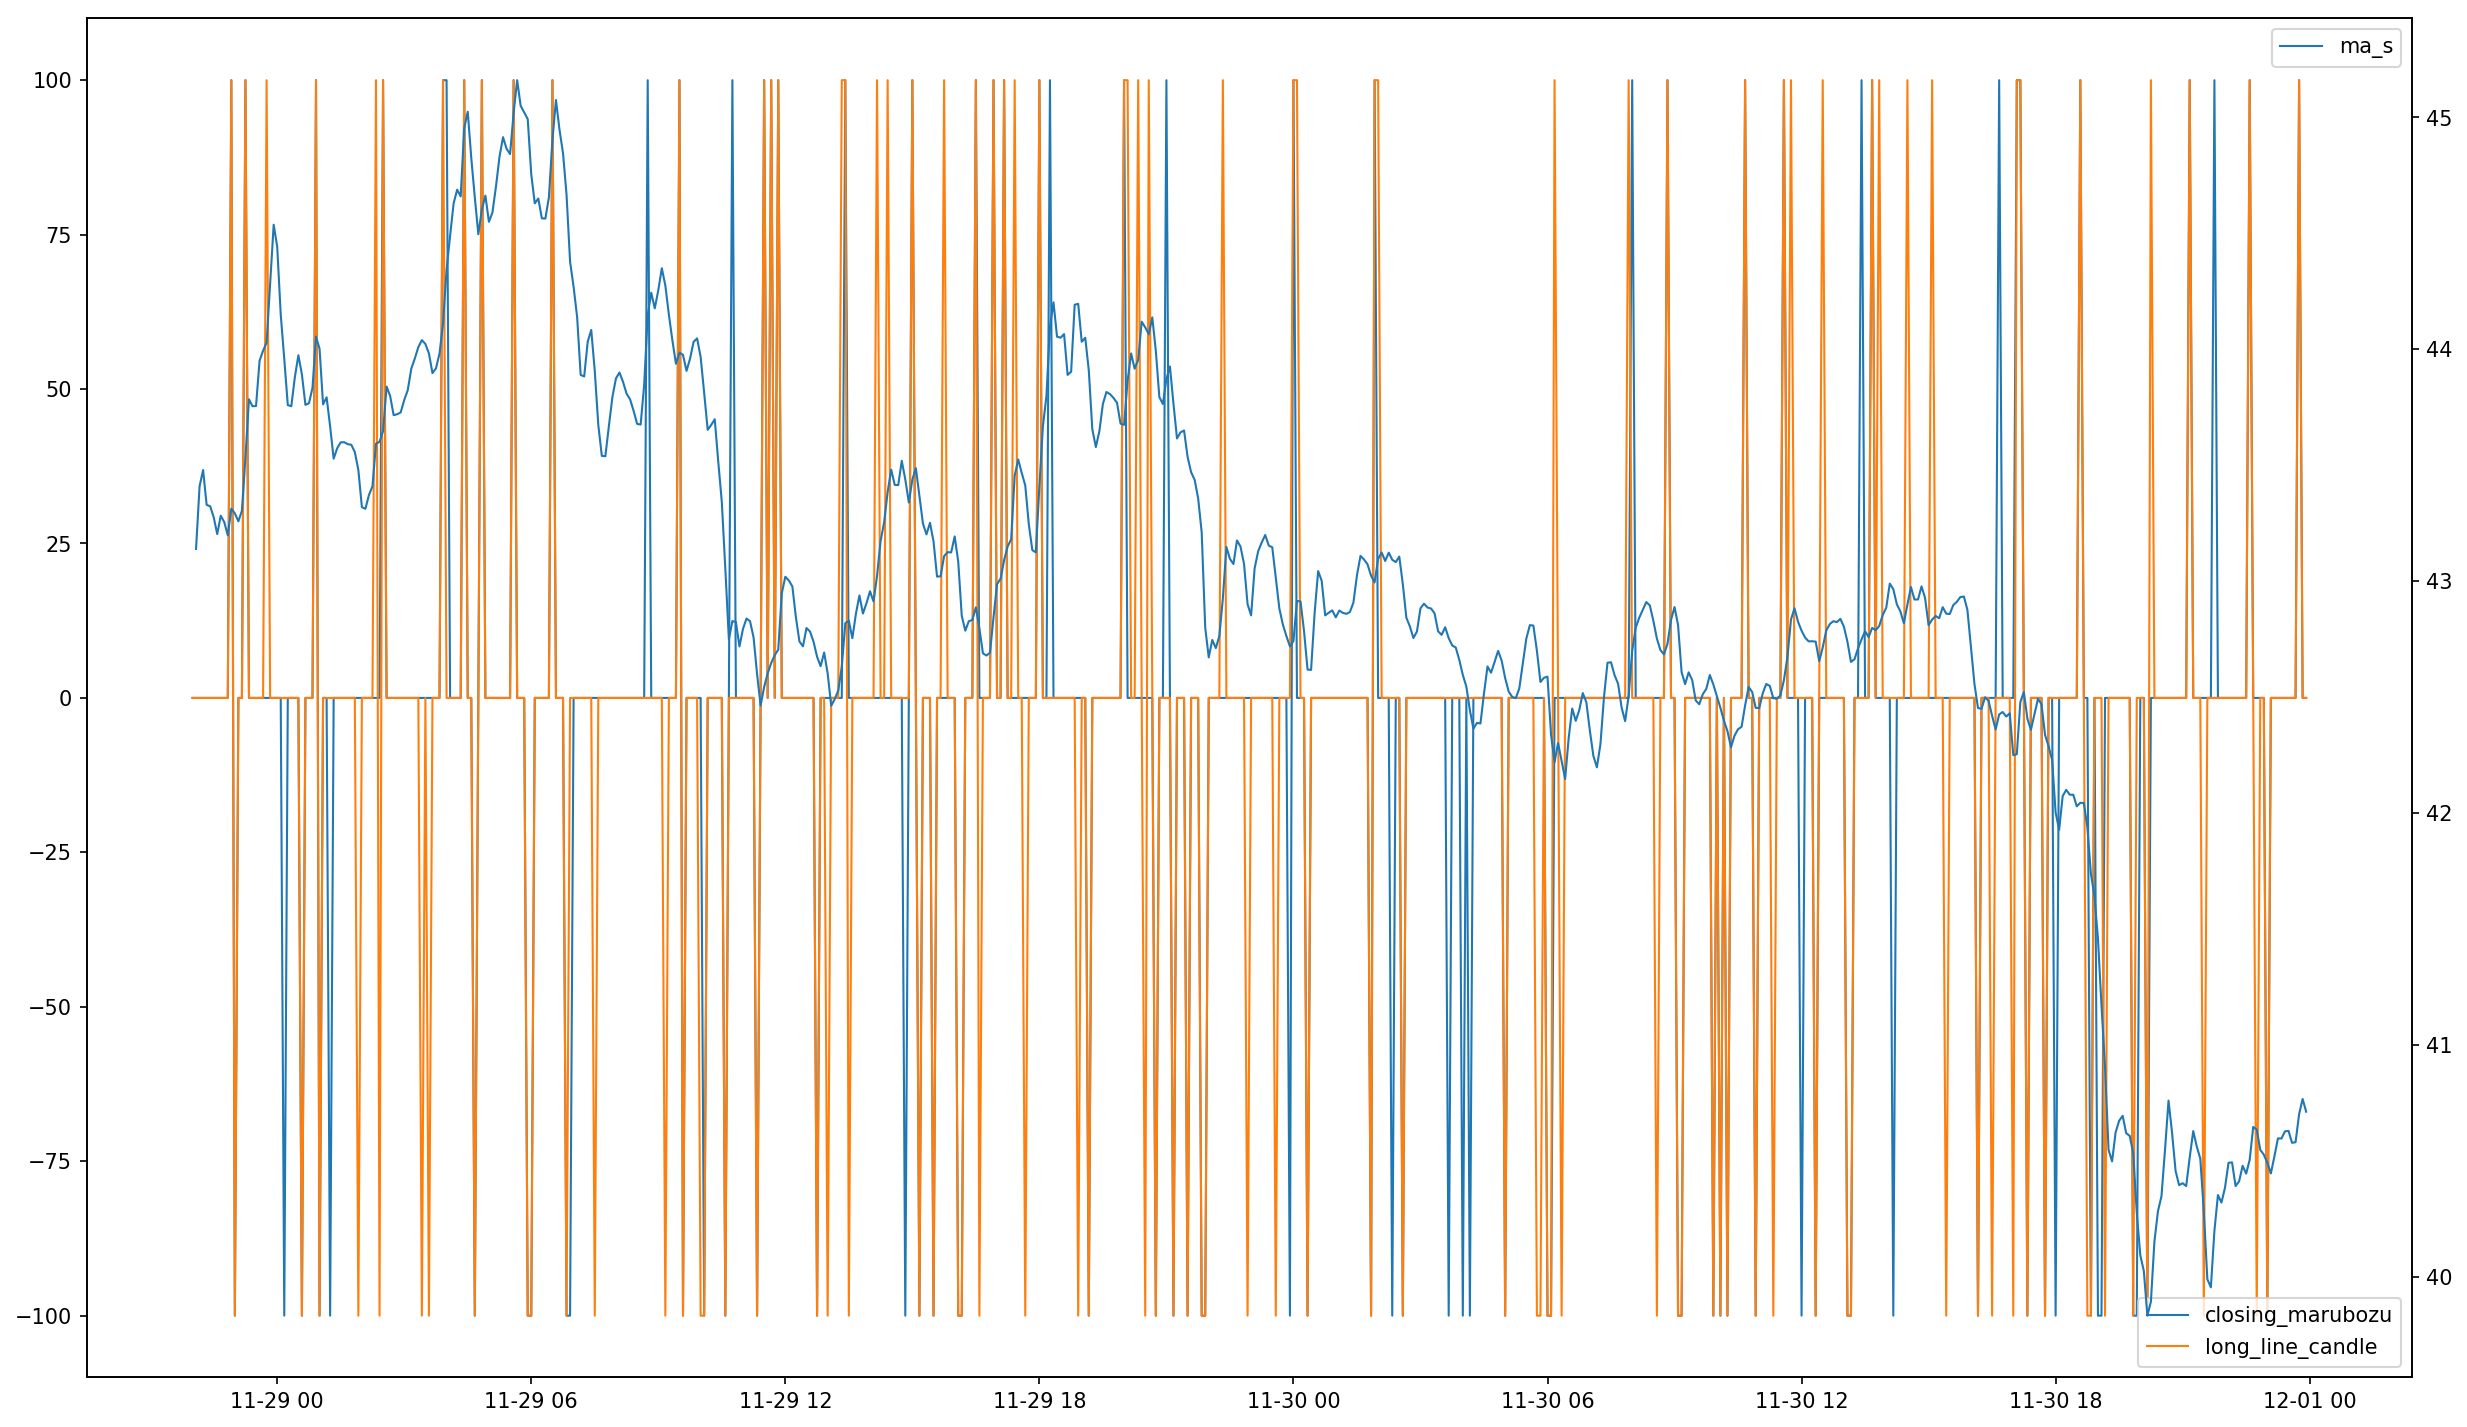

In [209]:
fig, ax1 = plt.subplots(figsize=(20, 12),dpi=150)
line1 = ax1.plot(candles.index, candles[['closing_marubozu', 'long_line_candle']], linewidth = 1.0)
ax1.legend(line1, ['closing_marubozu', 'long_line_candle'])
ax2 = ax1.twinx()
line2 = ax2.plot(candles['ma_s'], linewidth = 1.0)
ax2.legend(line2, ['ma_s'])
plt.savefig('talib_marubozu.jpg')

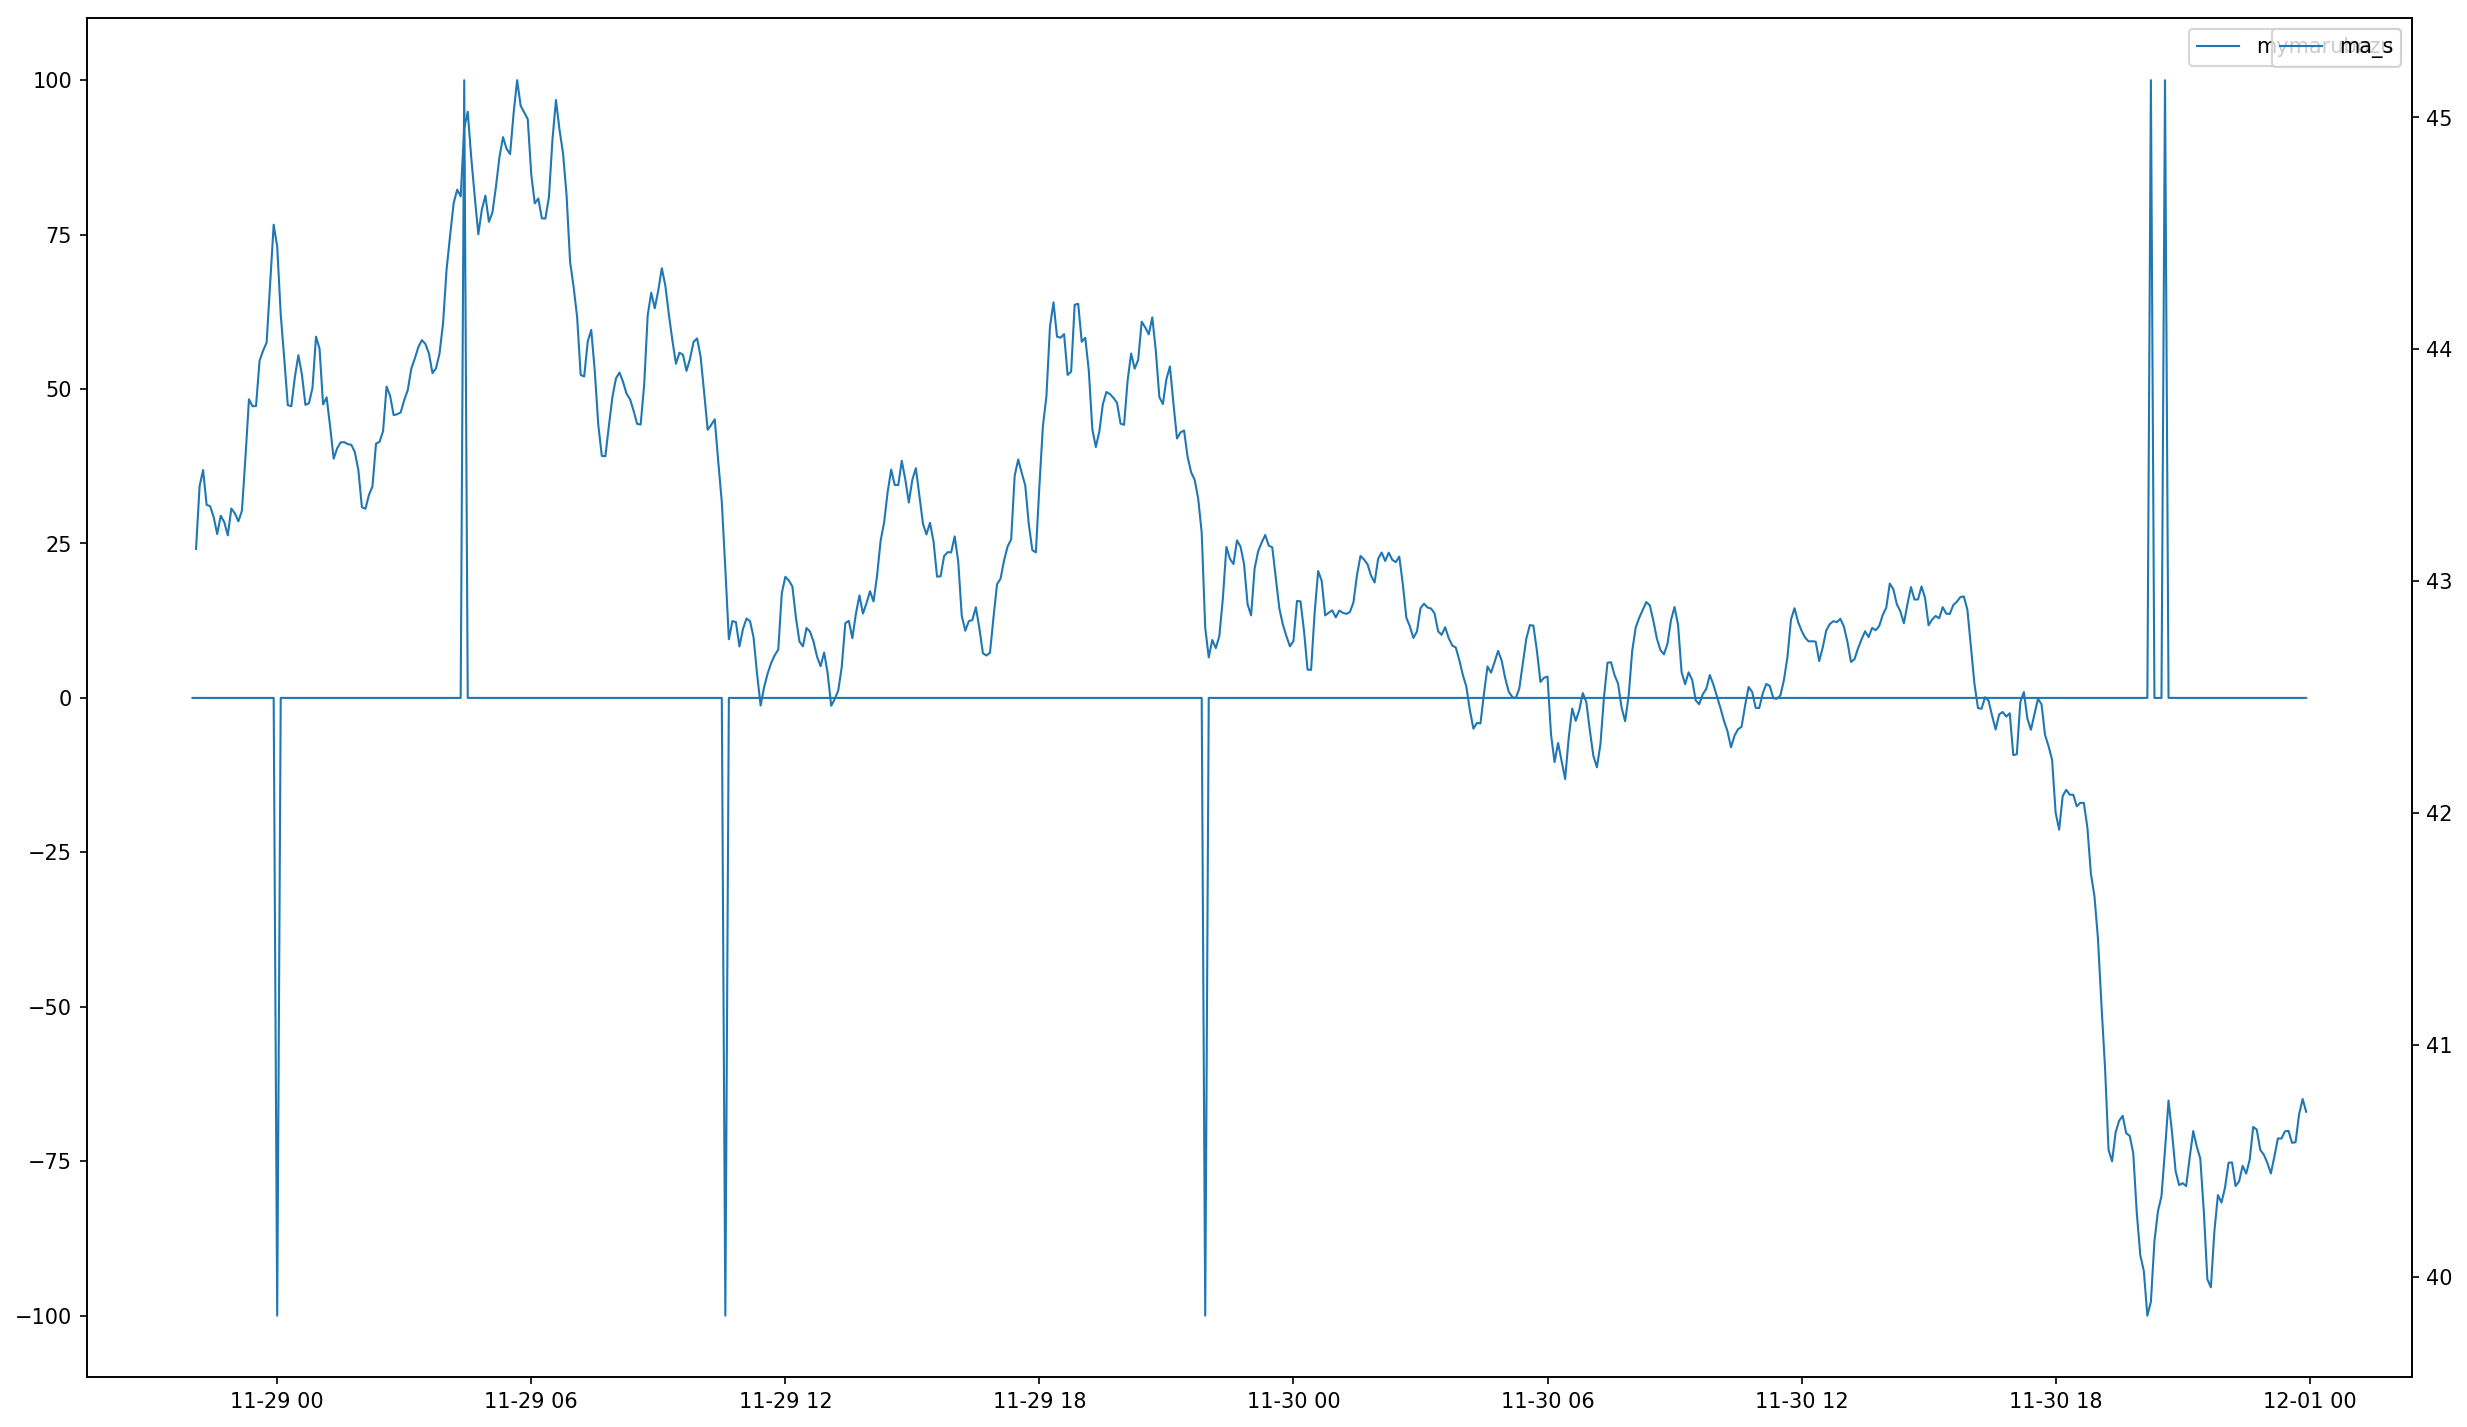

In [210]:
fig, ax1 = plt.subplots(figsize=(20, 12),dpi=150)
line1 = ax1.plot(candles.index, candles[['mymarubozu']], linewidth = 1.0)
ax1.legend(line1, ['mymarubozu'])
ax2 = ax1.twinx()
line2 = ax2.plot(candles['ma_s'], linewidth = 1.0)
ax2.legend(line2, ['ma_s'])
plt.savefig('mymarubozu.jpg')

In [211]:
mask = (candles['mymarubozu'] == -100) | (maer > 2)
candles.loc[mask, ['mymarubozu', 'maer']]

,mymarubozu,maer
timestamp,,
2018-11-28 23:55:00,0.0,2.449996
2018-11-29 00:00:00,-100.0,1.235758
2018-11-29 04:25:00,100.0,2.323075
2018-11-29 10:35:00,-100.0,-2.382899
2018-11-29 18:15:00,0.0,2.357374
2018-11-29 21:55:00,-100.0,-2.693334


In [212]:
mask = (candles['mymarubozu'] == 100) | (maer > 2)
candles.loc[mask, ['mymarubozu', 'maer']]

,mymarubozu,maer
timestamp,,
2018-11-28 23:55:00,0.0,2.449996
2018-11-29 04:25:00,100.0,2.323075
2018-11-29 18:15:00,0.0,2.357374
2018-11-30 20:15:00,100.0,-1.481581
2018-11-30 20:35:00,100.0,0.818408
